Kévin TANG

Yann VINCENT

# 1 Fundamentals

## 1. Loading the data

In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt

### (a) Download the dataset cars synthtic.csv found on the class website.

In [2]:
#Lecture du fichier de données
data = pd.read_csv('./cars_synthetic.csv', sep=',')

In [3]:
data

,type,color,year,length,condition,width,weight,price
0,Standard,White,2019,2.96,New Car,2.408290,3251.0,11777
1,SUV,Black,2010,3.34,Average,2.840680,3277.0,6006
2,Standard,Red,2022,2.95,Good,2.084228,3573.0,11925
3,Standard,White,2020,2.89,Good,2.292694,3159.0,10001
4,SUV,White,2013,3.23,Poor,2.935223,3791.0,5956
...,...,...,...,...,...,...,...,...
995,SUV,Red,2023,3.16,Poor,2.087509,2739.0,11878
996,SUV,Black,2022,3.26,Poor,2.202740,3284.0,10195
997,Standard,White,2017,2.88,Average,2.749120,3236.0,6620
998,Standard,Green,2021,2.91,Good,2.390186,3139.0,9996


### (b) Using pandas, load the file and check its content using for instance .head(2)

In [4]:
data.head(2)

,type,color,year,length,condition,width,weight,price
0,Standard,White,2019,2.96,New Car,2.40829,3251.0,11777
1,SUV,Black,2010,3.34,Average,2.84068,3277.0,6006


## 2. Column Types

### (a) Using df.info() , check the type that pandas assigned automatically to each column.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1000 non-null   object 
 1   color      998 non-null    object 
 2   year       1000 non-null   int64  
 3   length     1000 non-null   float64
 4   condition  1000 non-null   object 
 5   width      1000 non-null   float64
 6   weight     900 non-null    object 
 7   price      1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


### (b) One column has not been converted to the expected numerical type. Try to force conversion using pd.to numeric . An error should occur. This is because a row is problematic. You can use the option errors="coerce" to ignore those errors (nb.: you’ll certainly introduce new errors doing so, but let’s start with a quick and dirty approach)


In [6]:
data.weight = pd.to_numeric(data.weight, errors="coerce")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1000 non-null   object 
 1   color      998 non-null    object 
 2   year       1000 non-null   int64  
 3   length     1000 non-null   float64
 4   condition  1000 non-null   object 
 5   width      1000 non-null   float64
 6   weight     899 non-null    float64
 7   price      1000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


## 3. Data Quality


### (a) Compute the classic descriptors of the length column using pandas’ describe function. Check the mean, std, percentiles, and extreme values...

In [8]:
data.describe()

,year,length,width,weight,price
count,1000.000000,1000.000000,1000.000000,899.000000,1000.000000
mean,2018.949000,4.094950,2.301671,3149.516129,10228.396000
std,6.188109,17.565614,0.319473,315.504500,3942.829623
min,1942.000000,0.000000,-0.417315,2131.000000,3127.000000
25%,2018.000000,2.990000,2.092131,2920.500000,7649.000000
50%,2021.000000,3.130000,2.230401,3140.000000,9526.000000
75%,2022.000000,3.300000,2.500811,3376.500000,12257.000000
max,2023.000000,334.000000,3.215020,4005.000000,51684.000000


In [9]:
data['length'].describe()

count    1000.000000
mean        4.094950
std        17.565614
min         0.000000
25%         2.990000
50%         3.130000
75%         3.300000
max       334.000000
Name: length, dtype: float64

### (b) You should observe suspicious values, too low and too high. Keeping false values in the dataset would bias the results. We will replace them later with np.nan , but we need to explore the data to know which values to remove.

Voiture de longueur 0

Voiture à poids négatif

## 4. Missing values

### (a) Check the number of missing values in the color column. This value was already present when you did the df.info , but you can also use df[col].isna().sum() to compute it for one column.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1000 non-null   object 
 1   color      998 non-null    object 
 2   year       1000 non-null   int64  
 3   length     1000 non-null   float64
 4   condition  1000 non-null   object 
 5   width      1000 non-null   float64
 6   weight     899 non-null    float64
 7   price      1000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


In [11]:
data['color'].isna().sum()

2

### (b) For columns with few missing values, remove the corresponding rows. You can use the dropna() function. It has a subset parameter to take only some columns into account. For columns with many missing values, keep them for now.

In [12]:
data = data.dropna(subset=['color'])

## 5. Data Exploration


### (a) Plot the distribution of the length variable using a histogram. You can directly use pandas plotting tools ( df[col].plot.hist() ). Vary the number of bins using the bin parameter and observe the changes. Use a kde plot instead of a hist .

<Axes: ylabel='Frequency'>

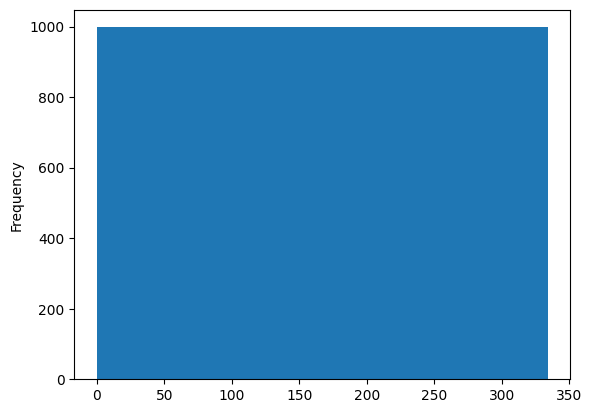

In [13]:
data['length'].plot.hist(bins=1)

<Axes: ylabel='Frequency'>

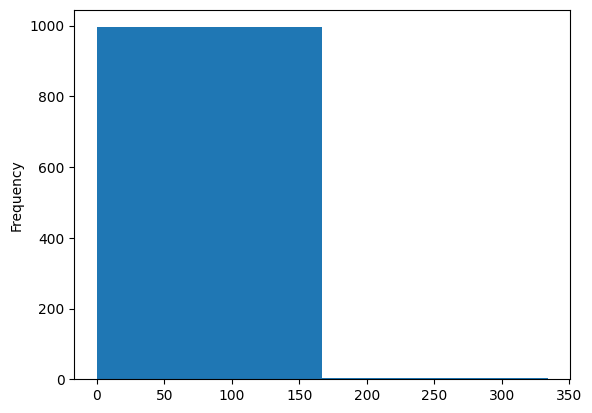

In [14]:
data['length'].plot.hist(bins=2)

<Axes: ylabel='Frequency'>

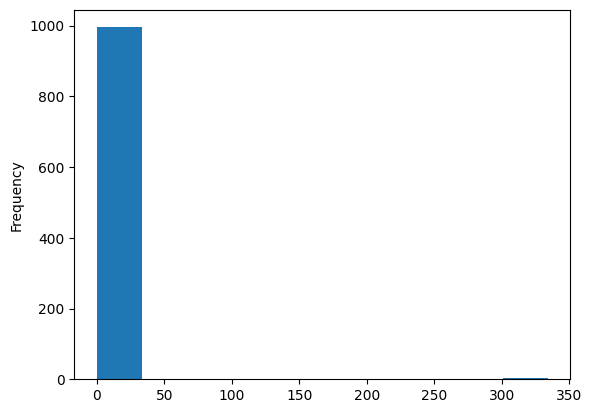

In [15]:
data['length'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

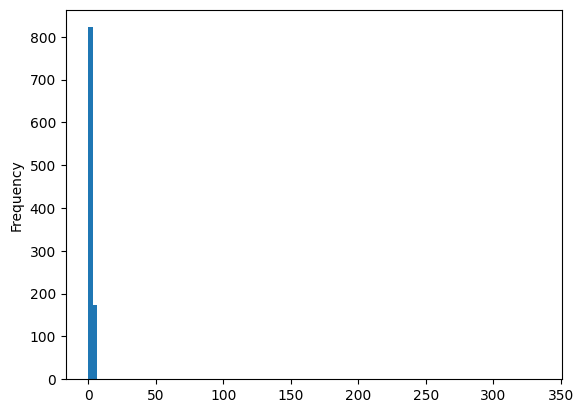

In [16]:
data['length'].plot.hist(bins=100)

<Axes: ylabel='Density'>

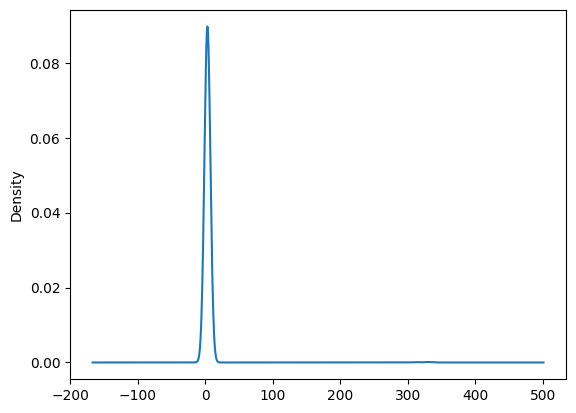

In [17]:
data['length'].plot.kde()

### (b) You should now have enough information to consider what are aberrant values for length. replaces those values with np.nan . You can use for instance np.where .

In [18]:
conditions_aberrantes = (data['length'] < 1) | (data['length'] > 5 )
data['length'] = np.where(conditions_aberrantes, np.nan, data['length'])

<ipython-input-18-fccbe78c1e32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = np.where(conditions_aberrantes, np.nan, data['length'])


In [19]:
data.describe()

,year,length,width,weight,price
count,998.000000,993.000000,998.000000,897.000000,998.000000
mean,2018.945892,3.138419,2.301882,3148.716834,10228.438878
std,6.193558,0.182338,0.319717,314.708929,3945.684697
min,1942.000000,2.640000,-0.417315,2131.000000,3127.000000
25%,2018.000000,2.990000,2.092430,2920.000000,7643.000000
50%,2021.000000,3.130000,2.230401,3140.000000,9526.000000
75%,2022.000000,3.300000,2.501172,3376.000000,12254.750000
max,2023.000000,3.610000,3.215020,4005.000000,51684.000000


<Axes: ylabel='Frequency'>

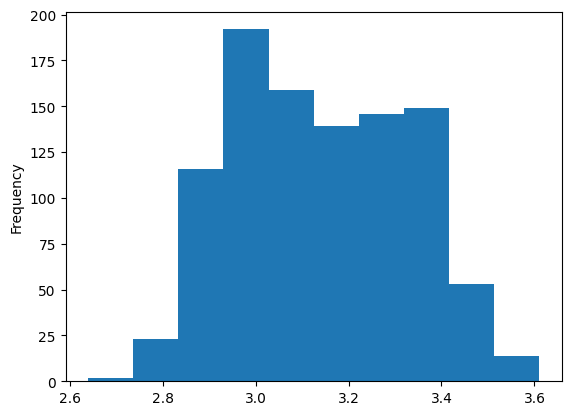

In [20]:
data['length'].plot.hist()

<Axes: ylabel='Density'>

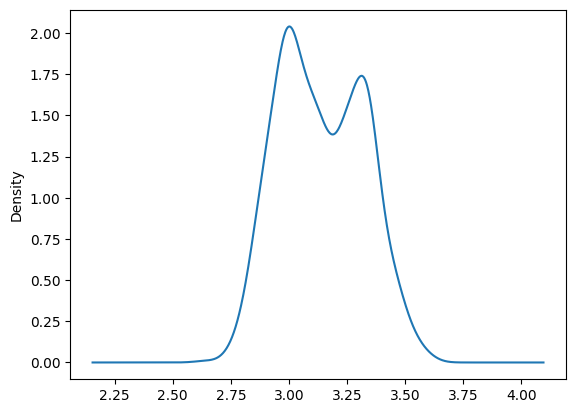

In [21]:
data['length'].plot.kde()

### (c) Interactive plots are often convenient to explore data. Pandas allows replacing the plotting backendwith an interactive library such as plotly. Install plotly library if needed, set it as the pandas plotting backend using pd.options.plotting.backend = "plotly" , and then write the same line as before for plotting the histogram. Observe that it is now an interactive plot


In [22]:
import plotly

In [23]:
pd.options.plotting.backend = "plotly"

In [24]:
data['length'].plot.hist(bins=10)

### (d) To really understand your data, you will however often have to spend time designing your own plots. In this example, use plotly’s px.scatter function to design a plot in which: x is the year , y is the price , the symbol shape depends on the type , the symbol color corresponds to car’s color and the symbol size corresponds to the car’s weight . Try to check if you see some patterns in it. For instance, does it seem that the color or the type has an influence on the price?


In [25]:
import plotly.express as px

In [26]:
data = data.dropna(subset=['weight'])

In [27]:
px.scatter(x=data.year, y=data.price, color=data.color, size=data.weight, symbol=data.type)

## 6. Distributions

### (a) Plot the cleaned distribution of the length . Does it look like a normal distribution? What about the distribution of length for the SUV only? Standard cars only?


In [28]:
suv = data[data['type'] == 'SUV']
standard = data[data['type'] == 'Standard']

In [29]:
suv['length'].plot.hist(bins=100)

Non, cela pourrait ressembler à une courbe normalement distribuée à première vue mais la partie gauche de la courbe est plus importante que la partie droite.

In [30]:
standard['length'].plot.hist(bins=100)

Oui, cela ressemble a une distribution normalement distribuée : forme de cloche, valeurs réparties de manière égale de part et d'autre de la moyenne.

### (b) To know if a variable follows or not a given distribution, the best is to use a statistical test. The Shapiro-Wilk test is a classic method to check normality for a variable. Check the Wikipedia page to see how to interpret it, then see how to run it in python ( scipy.stats.shapiro ).


In [31]:
import scipy

In [32]:
scipy.stats.shapiro(data['length'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [33]:
scipy.stats.shapiro(suv['length'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [34]:
scipy.stats.shapiro(standard['length'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [35]:
data.length.isna().sum()

5

In [36]:
data = data.dropna(subset=['length'])

In [37]:
suv = data[data['type'] == 'SUV']
standard = data[data['type'] == 'Standard']

In [38]:
scipy.stats.shapiro(data['length'])

ShapiroResult(statistic=0.9768217206001282, pvalue=1.0434624692079453e-10)

In [39]:
scipy.stats.shapiro(suv['length'])

ShapiroResult(statistic=0.9923036098480225, pvalue=0.028018662706017494)

In [40]:
scipy.stats.shapiro(standard['length'])

ShapiroResult(statistic=0.9965121150016785, pvalue=0.4032394587993622)

### (c) Evaluate if the variable length follows a normal distribution, for instance considering a p-value of 0.05, or 0.01 ?

D'après le test de Shapiro, la courbe de la longueur des SUV ne suit pas une loi normalement distribué car la p-value obtenue est très faible (0.028018662706017494) tandis que pour les voitures standards la p-value est très élevé (0.4032394587993622) au-dessus des seuils de 0.05 ou 0.01.

Pour les SUVs, la p-value obtenue se situe entre les deux seuils, on peut en conclure que la courbe suit à peu près une distribution normale mais pas complètement dûes à certaines valeurs.

## 7. Dispersion, Correlation


### (a) For the following questions, we will focus on the numerical variables only (length,weight,width,price,year). It might be easier to create a new dataframe with only those variables. You can use df[[’col1’, ’col2’]] . Keep only lines in which all values are not NaN. It is also interesting to compare what happens with and without removing the incoherent values of length: it affects a lot the results!


In [83]:
#Lecture du fichier de données
data7 = pd.read_csv('./cars_synthetic.csv', sep=',')

In [84]:
data7.weight = pd.to_numeric(data7.weight, errors="coerce")

In [85]:
data7 = data7[['length', 'weight', 'width', 'price', 'year']]

In [86]:
data7

,length,weight,width,price,year
0,2.96,3251.0,2.408290,11777,2019
1,3.34,3277.0,2.840680,6006,2010
2,2.95,3573.0,2.084228,11925,2022
3,2.89,3159.0,2.292694,10001,2020
4,3.23,3791.0,2.935223,5956,2013
...,...,...,...,...,...
995,3.16,2739.0,2.087509,11878,2023
996,3.26,3284.0,2.202740,10195,2022
997,2.88,3236.0,2.749120,6620,2017
998,2.91,3139.0,2.390186,9996,2021


In [87]:
data7.isna().sum()

length      0
weight    101
width       0
price       0
year        0
dtype: int64

In [88]:
data7 = data7.dropna()

In [94]:
data7

,length,weight,width,price,year
0,2.96,3251.0,2.408290,11777,2019
1,3.34,3277.0,2.840680,6006,2010
2,2.95,3573.0,2.084228,11925,2022
3,2.89,3159.0,2.292694,10001,2020
4,3.23,3791.0,2.935223,5956,2013
...,...,...,...,...,...
995,3.16,2739.0,2.087509,11878,2023
996,3.26,3284.0,2.202740,10195,2022
997,2.88,3236.0,2.749120,6620,2017
998,2.91,3139.0,2.390186,9996,2021


In [90]:
data7_clean = data7

In [91]:
conditions_aberrantes = (data7_clean['length'] < 1) | (data7_clean['length'] > 5 )
data7_clean.loc[conditions_aberrantes, 'length'] = np.nan

In [92]:
data7_clean

,length,weight,width,price,year
0,2.96,3251.0,2.408290,11777,2019
1,3.34,3277.0,2.840680,6006,2010
2,2.95,3573.0,2.084228,11925,2022
3,2.89,3159.0,2.292694,10001,2020
4,3.23,3791.0,2.935223,5956,2013
...,...,...,...,...,...
995,3.16,2739.0,2.087509,11878,2023
996,3.26,3284.0,2.202740,10195,2022
997,2.88,3236.0,2.749120,6620,2017
998,2.91,3139.0,2.390186,9996,2021


In [95]:
data7_clean.dropna()

,length,weight,width,price,year
0,2.96,3251.0,2.408290,11777,2019
1,3.34,3277.0,2.840680,6006,2010
2,2.95,3573.0,2.084228,11925,2022
3,2.89,3159.0,2.292694,10001,2020
4,3.23,3791.0,2.935223,5956,2013
...,...,...,...,...,...
995,3.16,2739.0,2.087509,11878,2023
996,3.26,3284.0,2.202740,10195,2022
997,2.88,3236.0,2.749120,6620,2017
998,2.91,3139.0,2.390186,9996,2021


On a ici **data7** avec toutes les données et **data7_clean** sans les données aberrantes de length

### (b) Compute the variance and standard deviation (you can use, e.g., std,var functions from pandas) for the variables.

In [100]:
data7.var()

length    3.310135e-02
weight    9.954309e+04
width     1.037594e-01
price     1.544382e+07
year      4.091374e+01
dtype: float64

In [101]:
data7.std()

length       0.181938
weight     315.504500
width        0.322117
price     3929.862244
year         6.396385
dtype: float64

In [102]:
data7_clean.var()

length    3.310135e-02
weight    9.954309e+04
width     1.037594e-01
price     1.544382e+07
year      4.091374e+01
dtype: float64

In [103]:
data7_clean.std()

length       0.181938
weight     315.504500
width        0.322117
price     3929.862244
year         6.396385
dtype: float64

### (c) Compute the covariance matrix, e.g., with cov function from pandas. Check the relation with the variance. Remember how to interpret those values: you can say something about the sign, but the magnitude alone is not directly interpretable.

In [104]:
data7.cov()

,length,weight,width,price,year
length,0.033101,34.295245,0.003130,7.800126e+01,-0.007594
weight,34.295245,99543.089662,0.211565,9.272843e+04,49.171241
width,0.003130,0.211565,0.103759,-6.275970e+02,-0.212067
price,78.001256,92728.427330,-627.597031,1.544382e+07,12868.551677
year,-0.007594,49.171241,-0.212067,1.286855e+04,40.913742


In [105]:
data7_clean.cov()

,length,weight,width,price,year
length,0.033101,34.295245,0.003130,7.800126e+01,-0.007594
weight,34.295245,99543.089662,0.211565,9.272843e+04,49.171241
width,0.003130,0.211565,0.103759,-6.275970e+02,-0.212067
price,78.001256,92728.427330,-627.597031,1.544382e+07,12868.551677
year,-0.007594,49.171241,-0.212067,1.286855e+04,40.913742


### (d) Compute the correlation coefficient between those variables, for instance using the corr function from pandas. By default, it uses the Pearson correlation coefficient. Interpret those coefficients. Using the class, check how it is computed from the covariance matrix

In [106]:
data7.corr()

,length,weight,width,price,year
length,1.000000,0.597046,0.053287,0.108874,-0.006508
weight,0.597046,1.000000,0.002082,0.074788,0.024365
width,0.053287,0.002082,1.000000,-0.495781,-0.102926
price,0.108874,0.074788,-0.495781,1.000000,0.511938
year,-0.006508,0.024365,-0.102926,0.511938,1.000000


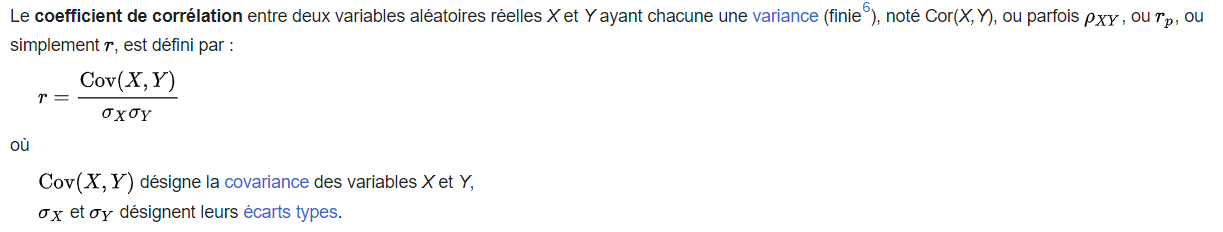

### (e) Remember that the assumption made when computing Pearson correlation is that the relation between the two variables is linear. Use pd.plotting.scatter matrix to have a look at the relation between all the variables. Find relations that are not linear.


array([[<Axes: xlabel='length', ylabel='length'>,
        <Axes: xlabel='weight', ylabel='length'>,
        <Axes: xlabel='width', ylabel='length'>,
        <Axes: xlabel='price', ylabel='length'>,
        <Axes: xlabel='year', ylabel='length'>],
       [<Axes: xlabel='length', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='width', ylabel='weight'>,
        <Axes: xlabel='price', ylabel='weight'>,
        <Axes: xlabel='year', ylabel='weight'>],
       [<Axes: xlabel='length', ylabel='width'>,
        <Axes: xlabel='weight', ylabel='width'>,
        <Axes: xlabel='width', ylabel='width'>,
        <Axes: xlabel='price', ylabel='width'>,
        <Axes: xlabel='year', ylabel='width'>],
       [<Axes: xlabel='length', ylabel='price'>,
        <Axes: xlabel='weight', ylabel='price'>,
        <Axes: xlabel='width', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='year', ylabel='price'>],
       [<Axes: xlabel=

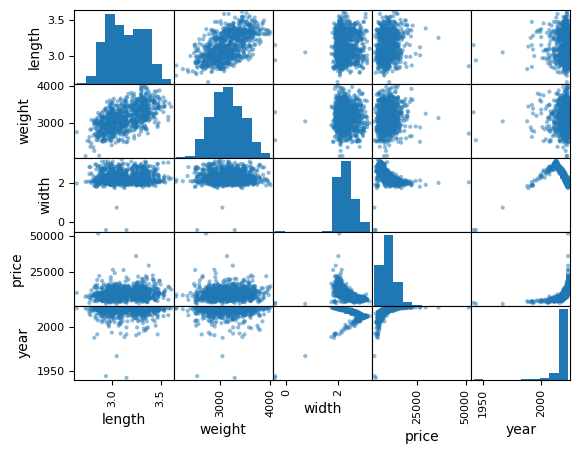

In [108]:
pd.plotting.scatter_matrix(data7)

array([[<Axes: xlabel='length', ylabel='length'>,
        <Axes: xlabel='weight', ylabel='length'>,
        <Axes: xlabel='width', ylabel='length'>,
        <Axes: xlabel='price', ylabel='length'>,
        <Axes: xlabel='year', ylabel='length'>],
       [<Axes: xlabel='length', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='width', ylabel='weight'>,
        <Axes: xlabel='price', ylabel='weight'>,
        <Axes: xlabel='year', ylabel='weight'>],
       [<Axes: xlabel='length', ylabel='width'>,
        <Axes: xlabel='weight', ylabel='width'>,
        <Axes: xlabel='width', ylabel='width'>,
        <Axes: xlabel='price', ylabel='width'>,
        <Axes: xlabel='year', ylabel='width'>],
       [<Axes: xlabel='length', ylabel='price'>,
        <Axes: xlabel='weight', ylabel='price'>,
        <Axes: xlabel='width', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='year', ylabel='price'>],
       [<Axes: xlabel=

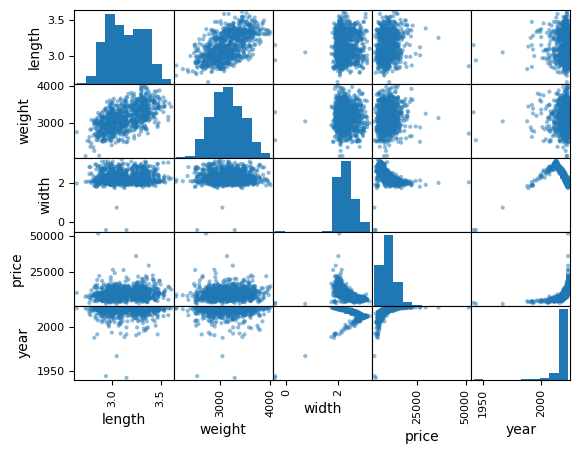

In [109]:
pd.plotting.scatter_matrix(data7_clean)

### (f) Check the documentation of the df.corr function to check how to compute the Spearman correlation. Compare the results with the previous ones.

In [111]:
data7.corr()

,length,weight,width,price,year
length,1.000000,0.597046,0.053287,0.108874,-0.006508
weight,0.597046,1.000000,0.002082,0.074788,0.024365
width,0.053287,0.002082,1.000000,-0.495781,-0.102926
price,0.108874,0.074788,-0.495781,1.000000,0.511938
year,-0.006508,0.024365,-0.102926,0.511938,1.000000


In [110]:
data7.corr(method='spearman')

,length,weight,width,price,year
length,1.000000,0.596722,0.052773,0.124351,-0.048095
weight,0.596722,1.000000,-0.008119,0.104629,-0.000066
width,0.052773,-0.008119,1.000000,-0.698676,-0.829883
price,0.124351,0.104629,-0.698676,1.000000,0.859537
year,-0.048095,-0.000066,-0.829883,0.859537,1.000000
